In [38]:
import parselmouth
import os.path
import glob
import pandas as pd
import numpy as np

In [42]:
# read .wav files and make mono .wav files 
def read_wav(wav_file):
    print("processing {}...".format(wav_file))
    snd = parselmouth.Sound(wav_file)
    if len(snd.extract_all_channels()) == 2:
        snd_A = snd.extract_all_channels()[0]
        snd_B = snd.extract_all_channels()[1]
               
        snd_A.save(os.path.splitext(wav_file)[0] + "A.wav", 'WAV')
        snd_B.save(os.path.splitext(wav_file)[0] + "B.wav", 'WAV')
        path_A = os.path.splitext(wav_file)[0] + "A.wav"
        path_B = os.path.splitext(wav_file)[0] + "B.wav"
        print(path_A, path_B)
        return snd_A, snd_B, path_A, path_B

In [43]:
# for wav_file in glob.glob("../data/*.wav"):
snd_A, snd_B, path_A, path_B = read_wav("../data/sw2005.wav")

processing ../data/sw2005.wav...
../data/sw2005A.wav ../data/sw2005B.wav


In [44]:
# read transcription files and add headers
def read_trans(path):
    trans = pd.read_csv(path, sep='\t', header=None)
    trans.columns = ["ms_id", "ldc_id", "start_time", "end_time", "tag", "ldc_trans", "ms_trans"]
    
    # drop rows which have the same start time
    trans = trans.drop_duplicates(subset="end_time")
    
    # however index cannot be reset, so convert df to nparray
    trans = trans.to_numpy()
    return trans

In [45]:
# get path list and trans list
path_list = sorted(glob.glob("../data/*.text"))
trans_list = []
for i in range(len(path_list)):
    trans_list.append(read_trans(path_list[i]))
trans_list

[array([['sw2005A-ms98-a-0001', 'A.1', 0.0, ..., nan, '[silence]',
         '[silence]'],
        ['sw2005A-ms98-a-0001', 'A.1', 0.8, ..., nan, 'Okay', 'okay'],
        ['sw2005A-ms98-a-0001', 'A.1', 1.28, ..., nan, 'Uh', 'uh'],
        ...,
        ['sw2005A-ms98-a-0073', 'A.177', 494.768375, ..., nan,
         '[silence]', '[silence]'],
        ['sw2005A-ms98-a-0073', 'A.177', 495.119, ..., nan, '[noise]',
         '[noise]'],
        ['sw2005A-ms98-a-0073', 'A.177', 496.62075, ..., nan, '[silence]',
         '[silence]']], dtype=object),
 array([['sw2005B-ms98-a-0001', 'B.2', 0.0, ..., nan, '[silence]',
         '[silence]'],
        ['sw2005B-ms98-a-0002', 'B.2', 10.4425, ..., nan, '[silence]',
         '[silence]'],
        ['sw2005B-ms98-a-0002', 'B.2', 11.233375, ..., nan, 'Well',
         'well'],
        ...,
        ['sw2005B-ms98-a-0124', 'B.176', 494.734375, ..., nan,
         '[silence]', '[silence]'],
        ['sw2005B-ms98-a-0124', 'B.176', 496.802125, ..., nan, '[noise]

In [87]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [52]:
# function to create a TextGrid 
def text_grid(sound, path, trans):
    tg = parselmouth.praat.call(sound, "To TextGrid", "word", "")
    
    # call.() or parselmouth.praat.call()?
    # timeit df.index < df.shape < df.[0].count()
    for i in range(len(trans)):
        if i < len(trans)-1:
            # one time point can only insert one boundary, need to delete rows with same time points
            # parselmouth.praat.call(tg, "Insert boundary", 1, trans.start_time[i+1])
            parselmouth.praat.call(tg, "Insert boundary", 1, trans[i, 3])
            parselmouth.praat.call(tg, "Set interval text", 1, i+1, trans[i, 6])
        else:
            parselmouth.praat.call(tg, "Set interval text", 1, i+1, trans[i, 6])
        
    tg.save(os.path.splitext(path)[0] + ".TextGrid")

In [53]:
text_grid(snd_A, path_A, trans_list[0])
text_grid(snd_B, path_B, trans_list[1])

In [37]:
parselmouth.praat.run_file("../data/stats/stats_batch.praat", "../data/wavinfo_list.txt", "../data/pf/", "no")

PraatError: Cannot open file “/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/Prosody-and-Perplexity/../data/demo/data/sw2005A-word.TextGrid”.
Script line 317 not performed or completed:
« Read from file... 'gv_word_textgrid$' »
Script not completed.

In [11]:
pf = pd.read_csv("/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/praat-prosody_v0.1.1/demo/work_dir/pf_files/demo_C-pf.Tab", sep='\t')
pf

,WORD$,WAV$,SPKR_ID$,GEN$,WORD_START,WORD_END,FWORD$,FWORD_START,FWORD_END,PAUSE_START,...,AVG_PHONE_DUR_NSP,MAX_PHONE_DUR_NSP,AVG_VOWEL_DUR_Z,MAX_VOWEL_DUR_Z,AVG_VOWEL_DUR_N,MAX_VOWEL_DUR_N,AVG_VOWEL_DUR_ZSP,MAX_VOWEL_DUR_ZSP,AVG_VOWEL_DUR_NSP,MAX_VOWEL_DUR_NSP
0,UMHM,../demo/data/demo_C.wav,C,female,672,709,OKAY,1442,1464,709,...,?,?,0.576141,1.743788,1.559701,2.694030,0.2886751345948128,1.1547005383792515,1.3199999999999998,2.28
1,OKAY,../demo/data/demo_C.wav,C,female,1442,1464,I'LL,1464,1485,1464,...,?,?,-0.779463,-0.621370,0.557160,0.651163,?,?,?,?
2,I'LL,../demo/data/demo_C.wav,C,female,1464,1485,I'LL,1547,1557,1485,...,1.5897435897435899,1.8461538461538463,0.616212,0.616212,1.560976,1.560976,1.1013775835078696,1.1013775835078696,1.8461538461538463,1.8461538461538463
3,I'LL,../demo/data/demo_C.wav,C,female,1547,1557,WRITE,1557,1580,1557,...,0.8038461538461539,0.8076923076923077,-0.348294,-0.348294,0.682927,0.682927,-0.25031308716087936,-0.25031308716087936,0.8076923076923077,0.8076923076923077
4,WRITE,../demo/data/demo_C.wav,C,female,1557,1580,YOU,1608,1627,1580,...,?,?,-0.776963,-0.776963,0.292683,0.292683,-0.8510644963469899,-0.8510644963469899,0.3461538461538462,0.3461538461538462
5,YOU,../demo/data/demo_C.wav,C,female,1608,1627,TELL,1630,1652,1627,...,1.1928879310344827,1.4482758620689655,0.564076,0.564076,1.250000,1.250000,-0.13245323570650425,-0.13245323570650425,0.9375,0.9375
6,TELL,../demo/data/demo_C.wav,C,female,1630,1652,ME,1652,1668,1652,...,?,?,1.733081,1.733081,2.115385,2.115385,?,?,?,?
7,ME,../demo/data/demo_C.wav,C,female,1652,1668,YOU,1677,1689,1668,...,1.1014285714285714,1.5599999999999998,0.434727,0.434727,1.322034,1.322034,1.12089707663561,1.12089707663561,1.5599999999999998,1.5599999999999998
8,YOU,../demo/data/demo_C.wav,C,female,1677,1689,TELL,1689,1714,1689,...,0.7467672413793104,0.9310344827586208,-0.564076,-0.564076,0.750000,0.750000,-0.9271726499455304,-0.9271726499455304,0.5625,0.5625
9,TELL,../demo/data/demo_C.wav,C,female,1689,1714,ME,1714,1725,1714,...,?,?,-0.059761,-0.059761,0.961538,0.961538,?,?,?,?


In [56]:
f=open("/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/data/demo/sw2005A-phone.TextGrid", "r")
if f.mode == "r":
    content = f.read()
type(content)

str

In [92]:
pf_test=pd.read_csv("/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/prosody_pro/finalvelocity.txt", sep='\t')
print(pf_test)
pf_test=pf_test.to_numpy()
print(pf_test.shape)
slope_test = pf_test[0][1:]
print(len(slope_test))
print(slope_test)

# get word importance values
wi= pd.read_csv("/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/wimp_corpus/annotations/20/2005/sw2005A-ms98-a-word.text", sep="\s+", header=None, engine="python")

#wi = np.loadtxt(fname = "/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/wimp_corpus/annotations/20/2005/sw2005A-ms98-a-word.text")
wi.columns = ["ms_id", "start_time", "end_time", "imp"]
wi = wi.imp.to_numpy()
print(wi)
print(len(wi))

#pf_text[0][1:]

   Filename  silence      okay         uh      first        um  silence.1  \
0  _sw2005A        0  3.574696  18.755913 -15.444266  4.201077   3.966331   
1  _sw2005B        0  0.000000   5.441503   6.191934 -8.361345  -9.624365   

           i      need      know  ...      all.3     right  silence.235  \
0  13.926015 -6.603200 -6.274271  ...  31.536672  7.128264     7.438347   
1  -8.877477 -9.513958  0.515856  ...        NaN       NaN          NaN   

        hey  silence.236   bye-bye  silence.237  silence.238  noise.4  \
0 -0.624478     1.610227 -0.919899          0.0          0.0      0.0   
1       NaN          NaN       NaN          NaN          NaN      NaN   

   silence.239  
0          0.0  
1          NaN  

[2 rows x 1182 columns]
(2, 1182)
1181
[0 3.5746957535141717 18.75591275426609 -15.44426597850416
 4.201077269871152 3.9663313614557807 13.926015150837705
 -6.603200326742785 -6.274270702847668 15.876889076471894
 12.047475320694726 -1.11852538200921 -10.433383026950658

KeyError: "None of [Int64Index([0], dtype='int64')] are in the [columns]"

In [9]:
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg

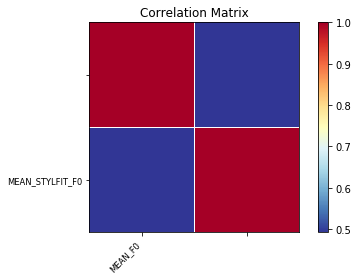

In [14]:
x = pf.MEAN_F0.to_numpy()
y = pf.MEAN_STYLFIT_ENERGY.to_numpy()
c_matrix = np.array([x, y])
corr_matrix = np.corrcoef(c_matrix)
corr_matrix
smg.plot_corr(corr_matrix, xnames=["MEAN_F0"], ynames=["MEAN_STYLFIT_F0"])
plt.show()

In [107]:
np.array([x, y])

array([[101.53384297, 102.26540546, 103.75305264, 126.39658187,
        121.86414019, 131.75730154, 144.54508782, 135.17518986,
        136.2868336 , 150.31434577, 135.7321238 , 131.72439049,
        137.2083989 , 134.54963462, 112.70338185, 118.64241123,
        111.50074561, 132.76082917],
       [101.86814276, 102.54362436, 105.18856861, 128.14314833,
        125.72840181, 131.43813768, 141.65257321, 129.13140631,
        135.95448171, 152.71338499, 144.22366273, 135.73394047,
        129.0105336 , 125.20146982, 114.66466318, 112.1342559 ,
        115.51029954, 134.7809936 ]])